# **Proyek Analisis Data: Air Quality Dataset**
- **Nama:** Felix Rafael
- **Email:** felixrafaelkwan@gmail.com
- **ID Dicoding:** FelixRafael

## Menentukan Pertanyaan Bisnis

- Bagaimana pola perubahan kualitas udara (PM2.5, PM10, NO2, O3) di tiga kota dari tahun ke tahun?
- Bagaimana pengaruh suhu (TEMP), kelembaban (DEWP), dan curah hujan (RAIN) terhadap tingkat polusi udara di tiga kota?
- Berdasarkan pada data yang ada, kota manakah yang memiliki tingkat polusi udara tertinggi?

## Import Packages/Library

In [1]:
#Mengimport beberapa package dan library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
#Membaca file CSV untuk data udara Changping
changpingDf = pd.read_csv('PRSA_Data_Changping_20130301-20170228.csv')

In [3]:
#Menampilkan 5 baris pertama data udara Changping
changpingDf.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


In [4]:
#Membaca file CSV untuk data udara Gucheng
guchengDf= pd.read_csv('PRSA_Data_Gucheng_20130301-20170228.csv')

In [5]:
#Menampilkan 5 baris pertama data udara Gucheng
guchengDf.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
1,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2,3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
3,4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
4,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng


In [6]:
#Membaca file CSV untuk data udara Nongzhanguan
nongzhanguanDf = pd.read_csv('PRSA_Data_Nongzhanguan_20130301-20170228.csv')

In [7]:
#Menampilkan 5 baris pertama data udara Nongzhanguan
nongzhanguanDf.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan


**Insight:**
  - Dataset mengandung data kualitas udara di tiga lokasi (Changping, Gucheng, dan Nongzhanguan) dari 2013 hingga 2017.
  - Parameter utama yang diukur adalah PM2.5, PM10, SO2, NO2, CO, dan O3, yang merupakan indikator utama polusi udara.
  - Data mencakup informasi tambahan mengenai suhu udara (TEMP), tekanan atmosfer (PRES), titik embun (DEWP), curah hujan (RAIN), arah angin (wd), dan kecepatan angin (WSPM).


### Assessing Data

#### Menilai tabel changpingDf

In [8]:
#Menampilkan informasi umum data udara Changping
changpingDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [9]:
#Mengecek jumlah missing values (NaN) tiap kolom data udara Changping
changpingDf.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,774
PM10,582
SO2,628
NO2,667
CO,1521


In [10]:
#Mengecek jumlah baris yang duplikat data udara Changping
changpingDf.duplicated().sum()

0

In [11]:
#Menampilkan statistik deskriptif data udara Changping
changpingDf.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34290.000000,34482.000000,34436.000000,34397.000000,33543.000000,34460.000000,35011.000000,35014.000000,35011.000000,35013.000000,34924,35021.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NNW,NaN,Changping
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4776,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,71.099743,94.657871,14.958906,44.182086,1152.301345,57.940003,13.686111,1007.760278,1.505495,0.060366,NaN,1.853836,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.326926,83.441738,20.975331,29.519796,1103.056282,54.316674,11.365313,10.225664,13.822099,0.752899,NaN,1.309808,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,15.636600,3.400000,999.300000,-10.200000,0.000000,NaN,1.000000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.700000,1007.400000,1.800000,0.000000,NaN,1.500000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,100.000000,131.000000,18.000000,60.358200,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,NaN,2.300000,NaN


#### Menilai tabel guchengDf

In [12]:
#Menampilkan informasi umum data udara Gucheng
guchengDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34418 non-null  float64
 6   PM10     34683 non-null  float64
 7   SO2      34557 non-null  float64
 8   NO2      34396 non-null  float64
 9   CO       33663 non-null  float64
 10  O3       34335 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35013 non-null  float64
 14  RAIN     35021 non-null  float64
 15  wd       34905 non-null  object 
 16  WSPM     35022 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [13]:
#Mengecek jumlah missing values (NaN) tiap kolom data udara Gucheng
guchengDf.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,646
PM10,381
SO2,507
NO2,668
CO,1401


In [14]:
#Mengecek jumlah baris yang duplikat data udara Gucheng
guchengDf.duplicated().sum()

0

In [15]:
#Menampilkan statistik deskriptif data udara Gucheng
guchengDf.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34418.000000,34683.000000,34557.000000,34396.000000,33663.000000,34335.000000,35013.000000,35014.000000,35013.000000,35021.000000,34905,35022.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,Gucheng
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3949,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.852089,118.861978,15.366162,55.871075,1323.974423,57.694879,13.864524,1008.829592,2.610442,0.064453,NaN,1.343310,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.796445,96.742626,21.204526,36.473860,1208.957772,57.019587,11.292857,10.103256,13.782991,0.838654,NaN,1.151064,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-15.600000,984.000000,-34.600000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,24.000000,45.000000,2.000000,26.000000,600.000000,10.000000,3.600000,1000.500000,-8.900000,0.000000,NaN,0.600000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,99.000000,7.000000,50.000000,900.000000,45.000000,14.800000,1008.500000,3.000000,0.000000,NaN,1.000000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.750000,167.000000,20.000000,79.000000,1600.000000,83.000000,23.500000,1017.000000,15.300000,0.000000,NaN,1.800000,NaN


#### Menilai tabel nongzhanguanDf

In [16]:
#Menampilkan informasi umum data udara Nongzhanguan
nongzhanguanDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34436 non-null  float64
 6   PM10     34624 non-null  float64
 7   SO2      34618 non-null  float64
 8   NO2      34372 non-null  float64
 9   CO       33858 non-null  float64
 10  O3       34558 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [17]:
#Mengecek jumlah missing values (NaN) tiap kolom data udara Nongzhanguan
nongzhanguanDf.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,628
PM10,440
SO2,446
NO2,692
CO,1206


In [18]:
#Mengecek jumlah baris yang duplikat data udara Nongzhanguan
nongzhanguanDf.duplicated().sum()

0

In [19]:
#Menampilkan statistik deskriptif data udara Nongzhanguan
nongzhanguanDf.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34436.000000,34624.000000,34618.000000,34372.000000,33858.000000,34558.000000,35044.000000,35044.000000,35044.000000,35044.000000,34986,35050.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENE,NaN,Nongzhanguan
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3861,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,84.838483,108.991096,18.689242,58.097172,1324.350198,58.534682,13.671490,1012.547419,2.447535,0.064020,NaN,1.860785,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.225344,95.341177,24.280665,36.297740,1245.166124,58.401448,11.458418,10.266059,13.810696,0.786282,NaN,1.280368,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.571200,2.000000,100.000000,0.214200,-16.800000,987.100000,-35.300000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,29.000000,500.000000,10.000000,3.100000,1004.000000,-8.800000,0.000000,NaN,1.000000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,85.000000,9.000000,51.000000,900.000000,45.000000,14.600000,1012.200000,3.000000,0.000000,NaN,1.500000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,149.000000,23.000000,80.000000,1600.000000,84.000000,23.500000,1020.900000,15.000000,0.000000,NaN,2.400000,NaN


**Insight:**
- Ketiga tabel dalam dataset terdiri atas 35.064 baris dan 18 kolom.
- Terdapat beberapa missing values (NaN) di beberapa kolom, terutama PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, dan WSPM.
- Tidak terdapat data yang duplikat pada tiap baris dalam suatu tabel. Hal ini berarti data sudah bersih dalam hal redundansi.
- Statistik deskriptif menunjukkan hasil yang beragam untuk tiap tabelnya baik itu kolom numerik ataupun kolom kategorikal.


### Cleaning Data

In [20]:
#Menggunakan median untuk mengisi nilai NaN pada polutan udara
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
changpingDf[pollutants] = changpingDf[pollutants].fillna(changpingDf[pollutants].median())
guchengDf[pollutants] = guchengDf[pollutants].fillna(guchengDf[pollutants].median())
nongzhanguanDf[pollutants] = nongzhanguanDf[pollutants].fillna(nongzhanguanDf[pollutants].median())

In [21]:
#Menggunakan interpolasi untuk mengisi nilai NaN pada cuaca
weather_features = ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
changpingDf[weather_features] = changpingDf[weather_features].interpolate()
guchengDf[weather_features] = guchengDf[weather_features].interpolate()
nongzhanguanDf[weather_features] = nongzhanguanDf[weather_features].interpolate()

In [23]:
#Mengisi nilai wd yang kosong dengan modus
changpingDf['wd'].fillna(changpingDf['wd'].mode()[0], inplace=True)
guchengDf['wd'].fillna(guchengDf['wd'].mode()[0], inplace=True)
nongzhanguanDf['wd'].fillna(nongzhanguanDf['wd'].mode()[0], inplace=True)

In [24]:
#Menggabungkan year, month, day menjadi format datetime
changpingDf['datetime'] = pd.to_datetime(changpingDf[['year', 'month', 'day', 'hour']])
guchengDf['datetime'] = pd.to_datetime(guchengDf[['year', 'month', 'day', 'hour']])
nongzhanguanDf['datetime'] = pd.to_datetime(nongzhanguanDf[['year', 'month', 'day', 'hour']])

**Insight:**
- Pada kolom polutan udara (PM2.5, PM10, SO2, NO2, CO, O3), missing values diisi dengan median karena data polutan udara memiliki outlier, sehingga median akan lebih robust dibanding mean dalam menangani outlier.
- Pada kolom cuaca (TEMP, PRES, DEWP, RAIN, WSPM), missing values diisi dengan interpolasi karena data cuaca memiliki tren waktu/pola berkelanjutan dari waktu ke waktu agar tetap akurat tanpa distorsi.
- Pada kolom arah angin (wd), missing values diisi dengan modus karena wd merupakan data kategori, sehingga modus dapat membantu mempertahankan pola dominan dari arah angin.
- Menggabungkan kolom waktu (year, month, day, hour) menjadi datetime agar data waktu lebih mudah dan fleksibel untuk dianalisis dalam format datetime.

## Exploratory Data Analysis (EDA)

### Explore changpingDf

In [25]:
#Menampilkan sampel acak data udara Changping
changpingDf.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
14028,14029,2014,10,6,12,22.0,22.0,2.0,21.0,400.0,51.0,20.20,1014.40,-0.5,0.0,ESE,2.3,Changping,2014-10-06 12:00:00
8127,8128,2014,2,2,15,12.0,112.0,15.0,12.0,300.0,77.0,6.40,1007.20,-24.3,0.0,N,2.3,Changping,2014-02-02 15:00:00
5025,5026,2013,9,26,9,40.0,126.0,8.0,52.0,700.0,5.0,18.10,1010.80,6.6,0.0,ESE,0.0,Changping,2013-09-26 09:00:00
13521,13522,2014,9,15,9,15.0,31.0,32.0,25.0,500.0,30.0,24.40,1011.30,-0.7,0.0,W,2.7,Changping,2014-09-15 09:00:00
33946,33947,2017,1,13,10,10.0,23.0,11.0,23.0,600.0,61.0,-1.85,1017.25,-18.1,0.0,NW,3.9,Changping,2017-01-13 10:00:00


In [26]:
#Analisis kualitas udara berdasarkan jam (hour) pada data udara Changping
changpingDf.groupby(by="hour").agg({
    "PM2.5": "mean",
    "PM10": "mean",
    "NO2": "mean",
    "CO": "mean"
}).sort_values(by="PM2.5", ascending=False)

,PM2.5,PM10,NO2,CO
hour,,,,
21,77.425394,106.902464,50.617008,1208.895962
20,77.382615,111.122519,52.083374,1202.249144
10,75.184120,103.673511,47.318838,1314.573580
11,75.122450,100.954825,44.340191,1207.997947
19,75.089665,108.413484,51.585473,1143.796030
22,74.730322,100.229979,48.220797,1186.987680
12,74.160164,97.088980,40.876520,1109.572895
23,73.045448,95.328405,45.800140,1183.154689
0,71.980835,93.031485,44.015166,1177.748802


In [27]:
#Analisis kualitas udara berdasarkan bulan (month) pada data udara Changping
changpingDf.groupby(by="month").agg({
    "PM2.5": "mean",
    "PM10": "mean",
    "NO2": "mean",
    "CO": "mean"
}).sort_values(by="PM2.5", ascending=False)

,PM2.5,PM10,NO2,CO
month,,,,
12,87.094758,110.351815,60.939056,1954.637097
3,83.826781,129.296304,54.940029,1239.445565
1,83.611694,104.392944,57.398858,1844.489247
10,80.781250,99.423051,52.593092,1020.329301
2,79.259218,96.640487,47.916667,1375.995575
11,78.388854,104.706944,56.306067,1560.416667
4,68.765625,107.778125,40.965982,777.347222
7,62.994288,74.947917,27.246754,821.034274
5,60.082191,95.840894,34.311520,702.607527


In [28]:
#Analisis kualitas udara berdasarkan arah angin (wd) pada kota Changping
changpingDf.groupby(by="wd").agg({
    "PM2.5": "mean",
    "PM10": "mean",
    "NO2": "mean",
    "CO": "mean"
}).sort_values(by="PM2.5", ascending=False)

,PM2.5,PM10,NO2,CO
wd,,,,
ESE,98.152513,124.588299,47.931104,1287.240847
E,93.177256,120.448496,48.293508,1285.198599
SE,85.745310,115.926221,44.584491,1132.847504
ENE,84.117241,107.881226,50.322513,1320.445977
SSE,81.507825,112.400971,42.145029,1079.381004
SSW,80.192718,102.508881,48.063838,1310.999112
SW,77.434091,98.548864,50.126593,1343.509091
S,75.160529,101.743529,43.234415,1167.874706
WSW,70.583807,89.738636,47.754331,1288.772727


**Insight:**
- Berdasarkan pada PM2.5, polusi udara tertinggi kota Changping umumnya terjadi pada jam ke 21.00, bulan ke 12, dan arah mata angin ESE (timur-tenggara).
- Berdasarkan pada PM10, polusi udara tertinggi kota Changping umumnya terjadi pada jam ke 20.00, bulan ke 3, dan arah mata angin ESE (timur-tenggara).
- Berdasarkan pada NO2, polusi udara tertinggi kota Changping umumnya terjadi pada jam ke 20.00, bulan ke 12, dan arah mata angin ENE (timur-timur laut).
- Berdasarkan pada CO, polusi udara tertinggi kota Changping umumnya terjadi pada jam ke 10.00, bulan ke 12, dan arah mata angin SW (barat daya).

### Explore guchengDf

In [29]:
#Menampilkan sampel acak data udara Gucheng
guchengDf.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
20891,20892,2015,7,19,11,80.0,80.0,2.0,30.0,500.0,89.0,25.5,1001.2,21.8,0.0,NNE,0.8,Gucheng,2015-07-19 11:00:00
19762,19763,2015,6,2,10,7.0,75.0,2.0,12.0,200.0,98.0,28.7,1001.8,-0.5,0.0,NNE,4.2,Gucheng,2015-06-02 10:00:00
20132,20133,2015,6,17,20,51.0,91.0,2.0,57.0,1100.0,148.0,25.7,995.3,21.8,0.0,SW,0.0,Gucheng,2015-06-17 20:00:00
34954,34955,2017,2,24,10,25.0,40.0,15.0,70.0,1100.0,37.0,6.6,1018.8,-13.1,0.0,NE,3.0,Gucheng,2017-02-24 10:00:00
24492,24493,2015,12,16,12,5.0,9.0,3.0,8.0,500.0,38.0,1.0,1023.2,-18.4,0.0,NW,2.8,Gucheng,2015-12-16 12:00:00


In [30]:
#Analisis kualitas udara berdasarkan jam (hour) pada data udara Gucheng
guchengDf.groupby(by="hour").agg({
    "PM2.5": "mean",
    "PM10": "mean",
    "NO2": "mean",
    "CO": "mean"
}).sort_values(by="PM2.5", ascending=False)

,PM2.5,PM10,NO2,CO
hour,,,,
21,100.967625,154.548255,69.673564,1476.309377
22,99.338125,150.914442,70.837626,1500.532512
20,98.555715,150.881040,65.753179,1401.017112
23,96.666735,146.290418,69.737145,1518.947296
0,93.336756,137.103354,66.191203,1508.479124
19,92.727310,141.938398,58.956156,1316.623546
1,89.040178,126.730048,62.128966,1446.327173
18,84.852841,130.702943,51.807123,1209.571526
2,84.111225,118.204860,59.503290,1399.581109


In [31]:
#Analisis kualitas udara berdasarkan bulan (month) pada data udara Gucheng
guchengDf.groupby(by="month").agg({
    "PM2.5": "mean",
    "PM10": "mean",
    "NO2": "mean",
    "CO": "mean"
}).sort_values(by="PM2.5", ascending=False)

,PM2.5,PM10,NO2,CO
month,,,,
12,109.611391,135.213374,70.941355,2259.005376
1,100.103696,121.703528,65.009644,2155.342742
11,99.538125,128.025208,66.230937,1764.097222
3,98.191297,151.573925,63.278166,1450.459341
10,97.575941,126.449933,66.758126,1188.373656
2,89.317109,107.219764,51.358407,1547.787611
4,75.431944,135.662153,54.266830,880.259375
6,72.290278,104.094444,47.864243,1037.570486
7,71.514113,99.928427,41.972387,846.502352


In [32]:
#Analisis kualitas udara berdasarkan arah angin (wd) pada kota Gucheng
guchengDf.groupby(by="wd").agg({
    "PM2.5": "mean",
    "PM10": "mean",
    "NO2": "mean",
    "CO": "mean"
}).sort_values(by="PM2.5", ascending=False)

,PM2.5,PM10,NO2,CO
wd,,,,
SSE,98.914102,134.353445,55.858530,1388.013522
SE,96.946349,128.915797,61.150028,1485.303279
S,96.661289,133.663892,52.660409,1296.620145
ESE,95.774353,125.378418,63.746599,1554.753141
N,90.015141,124.061831,64.272689,1416.639727
E,89.149658,117.006783,61.741428,1475.275669
ENE,87.109814,115.795756,60.686201,1484.382493
SSW,85.368501,126.952064,47.951315,1118.640478
WSW,84.865515,130.327761,58.096466,1239.597162


**Insight:**
- Berdasarkan pada PM2.5, polusi udara tertinggi kota Gucheng umumnya terjadi pada jam ke 21.00, bulan ke 12, dan arah mata angin SSE (tenggara-selatan).
- Berdasarkan pada PM10, polusi udara tertinggi kota Gucheng umumnya terjadi pada jam ke 21.00, bulan ke 3, dan arah mata angin SSE (tenggara-selatan).
- Berdasarkan pada NO2, polusi udara tertinggi kota Gucheng umumnya terjadi pada jam ke 22.00, bulan ke 12, dan arah mata angin N (utara).
- Berdasarkan pada CO, polusi udara tertinggi kota Gucheng umumnya terjadi pada jam ke 23.00, bulan ke 12, dan arah mata angin ESE (timur-tenggara).

### Explore nongzhanguanDf

In [33]:
#Menampilkan sampel acak data udara Nongzhanguan
nongzhanguanDf.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
22959,22960,2015,10,13,15,15.0,41.0,4.0,46.0,400.0,82.0,26.9,1013.9,0.6,0.0,WSW,1.8,Nongzhanguan,2015-10-13 15:00:00
26372,26373,2016,3,3,20,356.0,356.0,41.0,173.0,3900.0,11.0,6.7,1009.8,1.0,0.0,ENE,0.6,Nongzhanguan,2016-03-03 20:00:00
28132,28133,2016,5,16,4,18.0,51.0,2.0,92.0,500.0,2.0,9.6,1005.3,4.6,0.0,ENE,0.6,Nongzhanguan,2016-05-16 04:00:00
3831,3832,2013,8,7,15,31.0,28.0,10.0,27.0,700.0,54.0,26.4,998.6,19.3,0.1,NNW,3.0,Nongzhanguan,2013-08-07 15:00:00
26628,26629,2016,3,14,12,109.0,140.0,32.0,78.0,1500.0,47.0,11.4,1019.6,-8.0,0.0,NE,1.0,Nongzhanguan,2016-03-14 12:00:00


In [34]:
#Analisis kualitas udara berdasarkan jam (hour) pada data udara Nongzhanguan
nongzhanguanDf.groupby(by="hour").agg({
    "PM2.5": "mean",
    "PM10": "mean",
    "NO2": "mean",
    "CO": "mean"
}).sort_values(by="PM2.5", ascending=False)

,PM2.5,PM10,NO2,CO
hour,,,,
1,94.867420,121.054757,67.842268,1512.451745
0,93.728268,121.015058,69.099910,1473.225873
2,93.653730,118.494867,66.765123,1484.041068
23,93.205476,122.963039,70.114153,1447.148528
22,92.351129,123.039699,70.042769,1412.787817
3,92.000616,114.824162,66.133357,1448.518138
21,90.639904,122.551266,68.520704,1367.403833
4,89.709788,110.125941,64.340133,1448.520876
20,87.223819,118.503491,65.093379,1280.208761


In [35]:
#Analisis kualitas udara berdasarkan bulan (month) pada data udara Nongzhanguan
nongzhanguanDf.groupby(by="month").agg({
    "PM2.5": "mean",
    "PM10": "mean",
    "NO2": "mean",
    "CO": "mean"
}).sort_values(by="PM2.5", ascending=False)

,PM2.5,PM10,NO2,CO
month,,,,
12,116.648185,139.375336,76.602791,2241.498656
11,104.690972,129.945035,68.415580,1722.534722
1,101.520195,122.169019,67.652621,1899.126344
10,99.822581,120.644825,66.487788,1235.147849
3,98.166398,133.815289,68.870101,1367.000000
2,91.787242,107.175885,53.900442,1397.898230
4,72.621181,114.343194,54.795183,882.201042
6,72.306944,88.266771,46.287583,1107.467361
7,71.241532,83.006653,41.560662,1017.030242


In [36]:
#Analisis kualitas udara berdasarkan arah angin (wd) pada kota Nongzhanguan
nongzhanguanDf.groupby(by="wd").agg({
    "PM2.5": "mean",
    "PM10": "mean",
    "NO2": "mean",
    "CO": "mean"
}).sort_values(by="PM2.5", ascending=False)

,PM2.5,PM10,NO2,CO
wd,,,,
E,113.172699,135.730359,71.168081,1806.412177
ESE,111.218773,134.318884,66.256714,1655.968958
ENE,107.374359,129.124778,71.311617,1796.588474
SE,102.071011,127.785532,61.585099,1445.834043
SSE,98.455064,124.712981,56.723741,1318.818117
NE,96.451328,117.596073,67.623684,1595.612994
S,91.537815,116.639237,53.360232,1230.441500
SSW,82.243369,108.388786,50.374441,1057.540707
NNE,75.770228,95.214212,58.879548,1278.307573


**Insight:**
- Berdasarkan pada PM2.5, polusi udara tertinggi kota Nongzhanguan
umumnya terjadi pada jam ke 01.00, bulan ke 12, dan arah mata angin E (timur).
- Berdasarkan pada PM10, polusi udara tertinggi kota Nongzhanguan umumnya terjadi pada jam ke 22.00, bulan ke 12, dan arah mata angin E (timur).
- Berdasarkan pada NO2, polusi udara tertinggi kota Nongzhanguan umumnya terjadi pada jam ke 23.00, bulan ke 12, dan arah mata angin ENE (timur-timur laut).
- Berdasarkan pada CO, polusi udara tertinggi kota Nongzhanguan umumnya terjadi pada jam ke 01.00, bulan ke 12, dan arah mata angin E (timur).

### Explore changpingDf, guchengDf, dan nongzhanguanDf

In [37]:
#Menggabungkan data dari tiga kota menjadi satu dataset
air_quality_df = pd.concat([changpingDf, guchengDf, nongzhanguanDf], ignore_index=True)
air_quality_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping,2013-03-01 00:00:00
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping,2013-03-01 01:00:00
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping,2013-03-01 02:00:00
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping,2013-03-01 03:00:00
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping,2013-03-01 04:00:00


In [38]:
#Analisis statistik polutan berdasarkan kota
air_quality_df.groupby(by="station").agg({
    "PM2.5": ["max", "min", "mean", "std"],
    "PM10": ["max", "min", "mean", "std"],
    "SO2": ["max", "min", "mean", "std"],
    "NO2": ["max", "min", "mean", "std"],
    "CO": ["max", "min", "mean", "std"],
    "O3": ["max", "min", "mean", "std"],
})

PM2.5                              PM10                   \
                max  min       mean        std    max  min        mean   
station                                                                  
Changping     882.0  2.0  70.545694  71.619188  999.0  2.0   94.281790   
Gucheng       770.0  2.0  83.412651  82.092868  994.0  2.0  118.646161   
Nongzhanguan  844.0  2.0  84.375713  85.518369  995.0  2.0  108.690044   

                           SO2          ...        NO2                  CO  \
                    std    max     min  ...       mean        std      max   
station                                 ...                                  
Changping     82.796950  310.0  0.2856  ...  44.026443  29.259029  10000.0   
Gucheng       96.237612  500.0  0.2856  ...  55.759226  36.133665  10000.0   
Nongzhanguan  94.778710  257.0  0.5712  ...  57.957107  35.951326  10000.0   

                                                  O3                     \
                min         mean          std    max     min       mean   
station                                                                   
Changping     100.0  1137.019279  1081.250627  429.0  0.2142  57.734328   
Gucheng       100.0  1307.034309  1187.465580  450.0  0.2142  57.430945   
Nongzhanguan  100.0  1309.754991  1226.006366  390.0  0.2142  58.339367   

                         
                    std  
station                  
Changping     53.869215  
Gucheng       56.452790  
Nongzhanguan  58.000981  

[3 rows x 24 columns]

In [39]:
#Urutan rata-rata polusi PM2.5 tiap kota
air_quality_df.groupby("station")["PM2.5"].mean().sort_values(ascending=False)

,PM2.5
station,
Nongzhanguan,84.375713
Gucheng,83.412651
Changping,70.545694


In [40]:
#Urutan rata-rata polusi PM10 tiap kota
air_quality_df.groupby("station")["PM10"].mean().sort_values(ascending=False)

,PM10
station,
Gucheng,118.646161
Nongzhanguan,108.690044
Changping,94.281790


In [41]:
#Urutan rata-rata polusi SO2 tiap kota
air_quality_df.groupby("station")["SO2"].mean().sort_values(ascending=False)

,SO2
station,
Nongzhanguan,18.565999
Gucheng,15.245193
Changping,14.816361


In [42]:
#Urutan rata-rata polusi NO2 tiap kota
air_quality_df.groupby("station")["NO2"].mean().sort_values(ascending=False)

,NO2
station,
Nongzhanguan,57.957107
Gucheng,55.759226
Changping,44.026443


In [43]:
#Urutan rata-rata polusi CO tiap kota
air_quality_df.groupby("station")["CO"].mean().sort_values(ascending=False)

,CO
station,
Nongzhanguan,1309.754991
Gucheng,1307.034309
Changping,1137.019279


In [44]:
#Urutan rata-rata polusi O3 tiap kota
air_quality_df.groupby("station")["O3"].mean().sort_values(ascending=False)

,O3
station,
Nongzhanguan,58.339367
Changping,57.734328
Gucheng,57.430945


**Insight:**
- Penggabungan tiga kota menjadi satu dataset bertujuan untuk memudahkan proses analisis tingkat lanjut.
- Urutan rata-rata polusi PM2.5 dimulai dari Nongzhanguan (84.3), Gucheng (83.4), dan Changping (70.5).
- Urutan rata-rata polusi PM10 dimulai dari Gucheng (118.6), Nongzhanguan (108.6), dan Changping (94.2).
- Urutan rata-rata polusi SO2 dimulai dari Nongzhanguan (18.5), Gucheng (15.2), dan Changping (14.8).
- Urutan rata-rata polusi NO2 dimulai dari Nongzhanguan (57.9), Gucheng (55.7), dan Changping (44.0).
- Urutan rata-rata polusi CO dimulai dari Nongzhanguan (1309.7), Gucheng (1307.0), dan Changping (1137.0).
- Urutan rata-rata polusi O3 dimulai dari Nongzhanguan (58.3), Changping (57.7), dan Gucheng (57.4).

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola perubahan kualitas udara (PM2.5, PM10, NO2, O3) di tiga kota dari tahun ke tahun?

In [45]:
#Menyiapkan data untuk analisis tren polusi
pollution_trend = air_quality_df.groupby(["year", "station"])[["PM2.5", "PM10", "NO2", "O3"]].mean().reset_index()

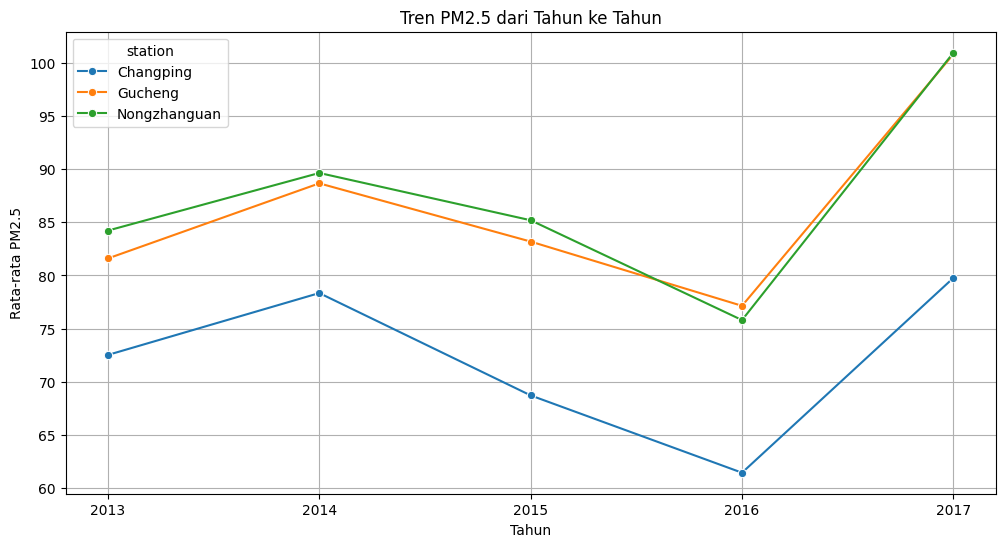

In [46]:
#Visualisasi tren PM2.5 di tiap kota berdasarkan tahun
plt.figure(figsize=(12, 6))
sns.lineplot(data=pollution_trend, x="year", y="PM2.5", hue="station", marker="o")
plt.title("Tren PM2.5 dari Tahun ke Tahun")
plt.xlabel("Tahun")
plt.ylabel("Rata-rata PM2.5")
plt.grid()
plt.xticks(ticks=pollution_trend["year"].unique(), labels=pollution_trend["year"].unique().astype(int))
plt.show()

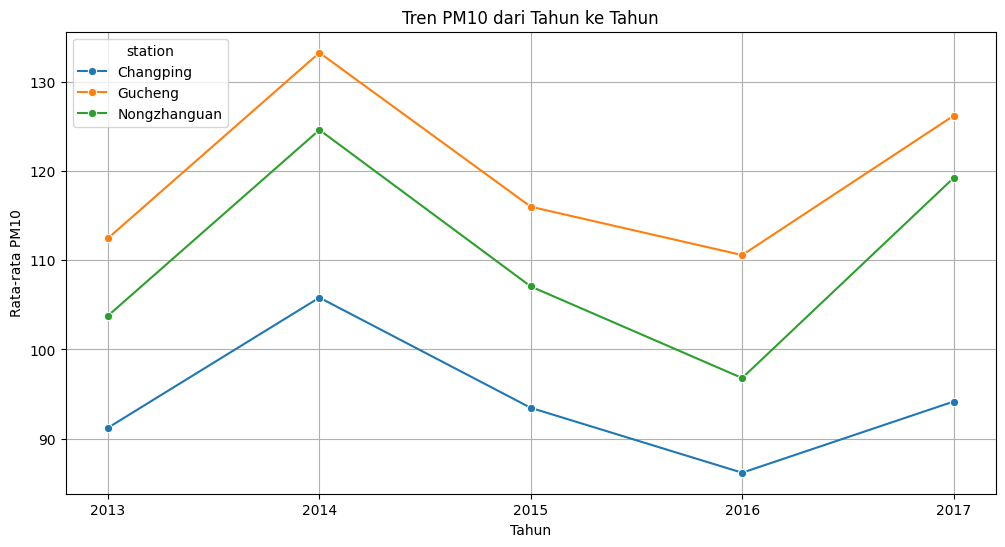

In [47]:
#Visualisasi tren PM10 di tiap kota berdasarkan tahun
plt.figure(figsize=(12, 6))
sns.lineplot(data=pollution_trend, x="year", y="PM10", hue="station", marker="o")
plt.title("Tren PM10 dari Tahun ke Tahun")
plt.xlabel("Tahun")
plt.ylabel("Rata-rata PM10")
plt.grid()
plt.xticks(ticks=pollution_trend["year"].unique(), labels=pollution_trend["year"].unique().astype(int))
plt.show()

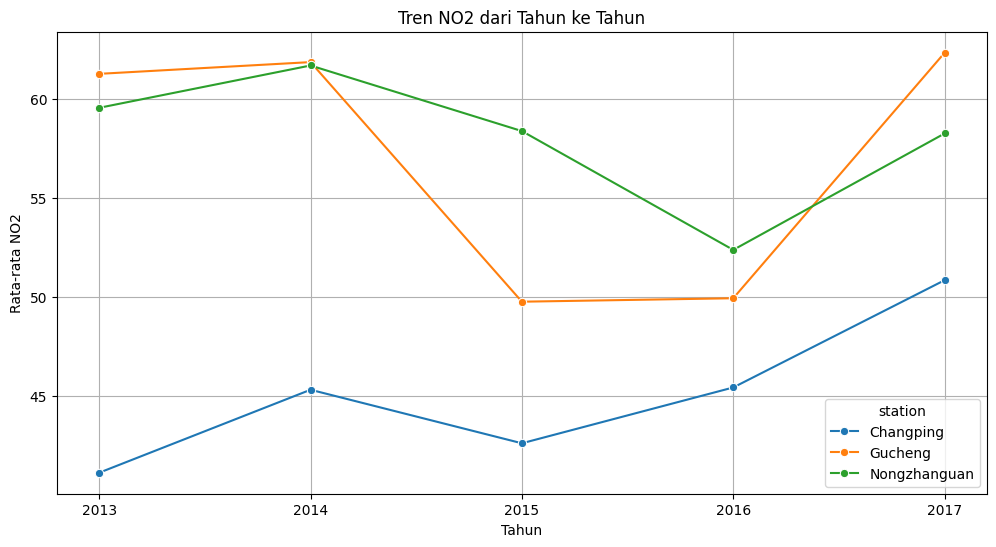

In [48]:
#Visualisasi tren NO2 di tiap kota berdasarkan tahun
plt.figure(figsize=(12, 6))
sns.lineplot(data=pollution_trend, x="year", y="NO2", hue="station", marker="o")
plt.title("Tren NO2 dari Tahun ke Tahun")
plt.xlabel("Tahun")
plt.ylabel("Rata-rata NO2")
plt.grid()
plt.xticks(ticks=pollution_trend["year"].unique(), labels=pollution_trend["year"].unique().astype(int))
plt.show()

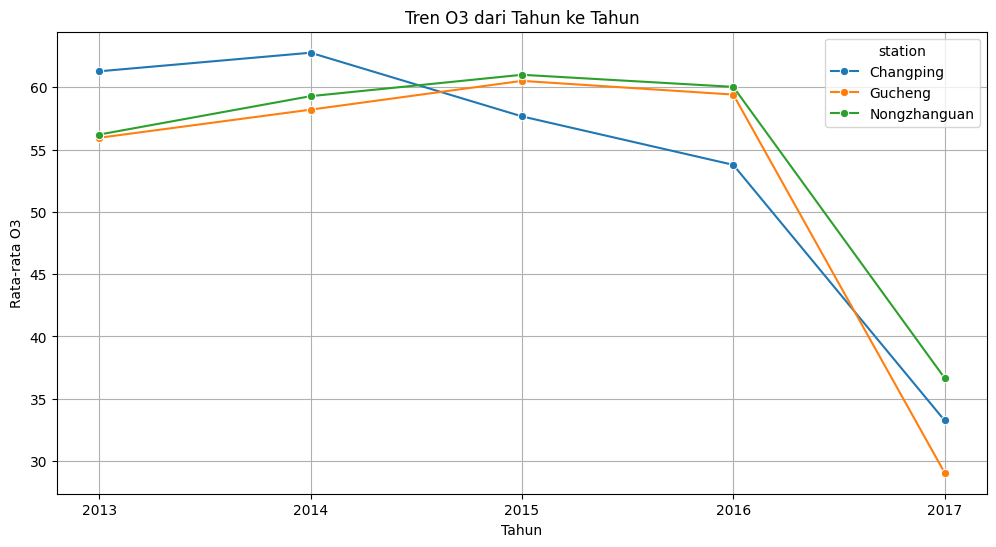

In [49]:
#Visualisasi tren O3 di tiap kota berdasarkan tahun
plt.figure(figsize=(12, 6))
sns.lineplot(data=pollution_trend, x="year", y="O3", hue="station", marker="o")
plt.title("Tren O3 dari Tahun ke Tahun")
plt.xlabel("Tahun")
plt.ylabel("Rata-rata O3")
plt.grid()
plt.xticks(ticks=pollution_trend["year"].unique(), labels=pollution_trend["year"].unique().astype(int))
plt.show()

**Insight:**
- Tren PM2.5 (2013-2017) menunjukkan bahwa tingkat tertinggi terjadi di Nongzhanguan (2017) dan Gucheng (2017). Tahun 2017 menjadi puncak tertinggi untuk ketiga kota tersebut. Secara umum, tren PM2.5 mengalami fluktuasi, dengan penurunan signifikan dari 2014 ke 2016, namun melonjak tajam pada 2016 ke 2017.

- Tren PM10 (2013-2017) mencapai puncaknya di Gucheng (2014), dengan tahun 2014 menjadi periode tertinggi untuk ketiga kota. Setelah itu, tren PM10 menurun dari 2014 hingga 2016, tetapi kembali mengalami kenaikan signifikan pada 2016 hingga 2017.

- Tren NO2 (2013-2017) tertinggi terjadi di Gucheng (2017). Tahun 2017 menjadi puncak untuk Gucheng dan Changping, sementara Nongzhanguan mencapai puncaknya pada 2014. Pola NO2 cukup bervariasi:
  - Nongzhanguan mengalami penurunan dari 2014 hingga 2016, lalu meningkat kembali pada 2017.
  - Gucheng mengalami penurunan sejak 2014 hingga 2016, stabil pada 2015-2016, dan melonjak tajam pada 2017.
  - Changping mengalami penurunan dari 2014 ke 2015, lalu meningkat kembali pada 2015 ke 2017.

- Tren O3 (2013-2017) tertinggi terjadi di Changping (2014). Tahun tertinggi untuk O3 adalah 2014 di Changping, serta 2015 di Gucheng dan Nongzhanguan.
  - Gucheng dan Nongzhanguan mengalami kenaikan dari 2013 hingga 2015, tetapi menurun drastis sejak 2016 hingga 2017.
  - Changping mengalami penurunan sejak 2014 hingga 2017.


### Pertanyaan 2: Bagaimana pengaruh suhu (TEMP), kelembaban (DEWP), dan curah hujan (RAIN) terhadap tingkat polusi udara di tiga kota?

In [50]:
#Menyiapkan data untuk analisis korelasi
correlation_columns = ["PM2.5", "PM10", "NO2", "O3", "TEMP", "DEWP", "RAIN"]

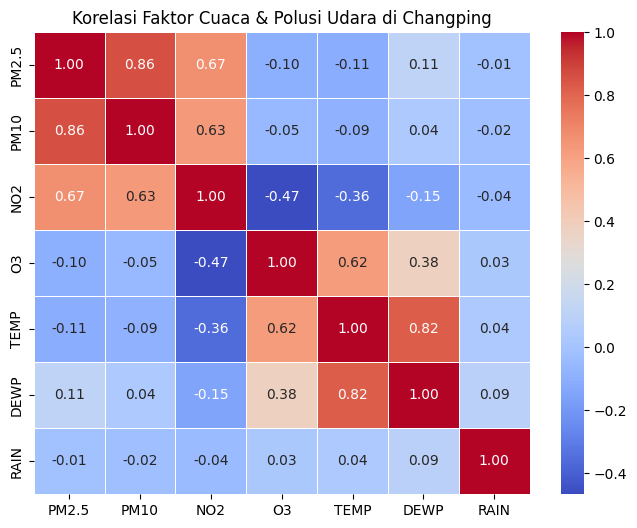

In [51]:
#Visualisasi korelasi faktor cuaca dan polusi udara di kota Changping
changping_df = air_quality_df[air_quality_df["station"] == "Changping"]
corr_matrix_changping = changping_df[correlation_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_changping, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Korelasi Faktor Cuaca & Polusi Udara di Changping")
plt.show()

**Insight:**
- Suhu (TEMP) memiliki hubungan negatif dengan NO2 (-0.36), PM2.5 (-0.11) dan PM10 (-0.09), yang menunjukkan bahwa saat suhu meningkat, polusi ini cenderung menurun, mungkin karena efek dispersi udara. Namun, suhu berkorelasi positif dengan O3 (0.62), yang masuk akal karena pembentukan ozon meningkat saat suhu lebih tinggi.
- Kelembaban (DEWP) cenderung memiliki korelasi negatif dengan NO2, PM2.5, dan PM10, yang menunjukkan bahwa peningkatan kelembaban dapat membantu mengurangi konsentrasi polutan partikulat melalui peningkatan dispersi udara.
- Hujan (RAIN) tidak menunjukkan korelasi yang signifikan dengan polutan utama, kecuali sedikit korelasi negatif dengan NO2 (-0.04), yang bisa berarti hujan memiliki efek kecil dalam membersihkan polutan udara.


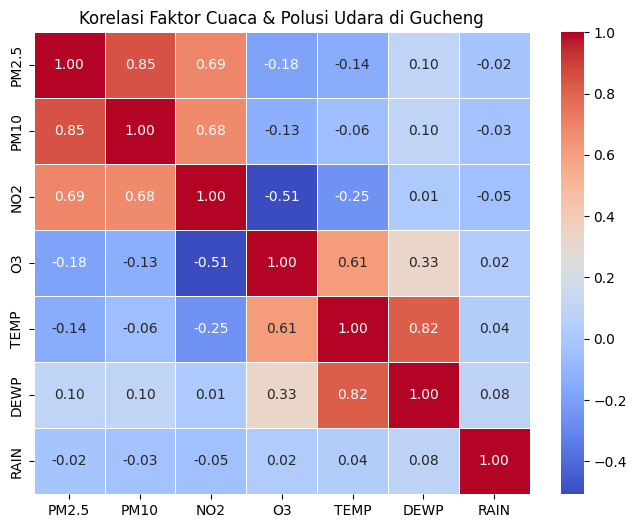

In [52]:
#Visualisasi korelasi faktor cuaca dan polusi udara di kota Gucheng
gucheng_df = air_quality_df[air_quality_df["station"] == "Gucheng"]
corr_matrix_gucheng = gucheng_df[correlation_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_gucheng, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Korelasi Faktor Cuaca & Polusi Udara di Gucheng")
plt.show()

**Insight:**
- Suhu (TEMP) memiliki hubungan negatif dengan NO2 (-0.25), PM2.5 (-0.14), dan PM10 (-0.06), yang menunjukkan bahwa saat suhu meningkat, polusi ini cenderung menurun, kemungkinan karena efek dispersi udara. Namun, suhu berkorelasi positif dengan O3 (0.61), yang masuk akal karena pembentukan ozon meningkat saat suhu lebih tinggi.
- Kelembaban (DEWP) memiliki korelasi negatif lemah dengan NO2 (-0.01) tetapi menunjukkan korelasi positif dengan O3 (0.33), yang menunjukkan bahwa kelembaban berkontribusi terhadap pembentukan ozon namun tidak terlalu mempengaruhi polutan partikulat.
- Hujan (RAIN) tidak menunjukkan korelasi yang signifikan dengan polutan utama, kecuali sedikit korelasi negatif dengan NO2 (-0.05), yang bisa berarti hujan memiliki efek kecil dalam mengurangi polusi udara di Gucheng.

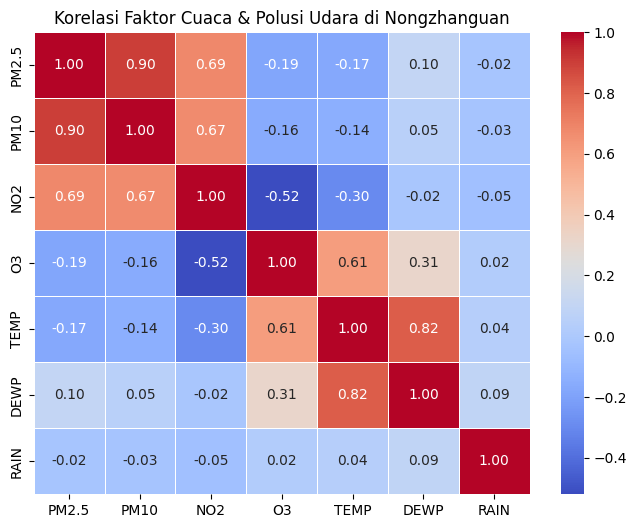

In [53]:
#Visualisasi korelasi faktor cuaca dan polusi udara di kota Nongzhanguan
nongzhanguan_df = air_quality_df[air_quality_df["station"] == "Nongzhanguan"]
corr_matrix_nongzhanguan = nongzhanguan_df[correlation_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_nongzhanguan, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Korelasi Faktor Cuaca & Polusi Udara di Nongzhanguan")
plt.show()

**Insight:**
- Suhu (TEMP) memiliki hubungan negatif dengan NO2 (-0.30), PM2.5 (-0.17), dan PM10 (-0.14), yang menunjukkan bahwa peningkatan suhu cenderung menurunkan konsentrasi polutan ini, kemungkinan karena efek dispersi udara. Namun, suhu berkorelasi positif dengan O3 (0.61), yang mengindikasikan bahwa ozon lebih banyak terbentuk saat suhu lebih tinggi.
- Kelembaban (DEWP) memiliki korelasi negatif lemah dengan NO2 (-0.02) tetapi menunjukkan korelasi positif dengan O3 (0.31), yang menunjukkan bahwa kelembaban berkontribusi terhadap pembentukan ozon namun tidak terlalu mempengaruhi polutan partikulat.
- Hujan (RAIN) tidak menunjukkan korelasi yang signifikan dengan polutan utama, kecuali sedikit korelasi negatif dengan NO2 (-0.05), yang menunjukkan bahwa hujan memiliki efek kecil dalam membersihkan udara dari polutan di Nongzhanguan.

### Pertanyaan 3: Berdasarkan pada data yang ada, kota manakah yang memiliki tingkat polusi udara tertinggi?


In [54]:
#Group by kota dan hitung rata-rata polutan utama
pollution_avg = air_quality_df.groupby("station")[["PM2.5", "PM10", "NO2", "O3"]].mean()

<Figure size 1200x600 with 0 Axes>

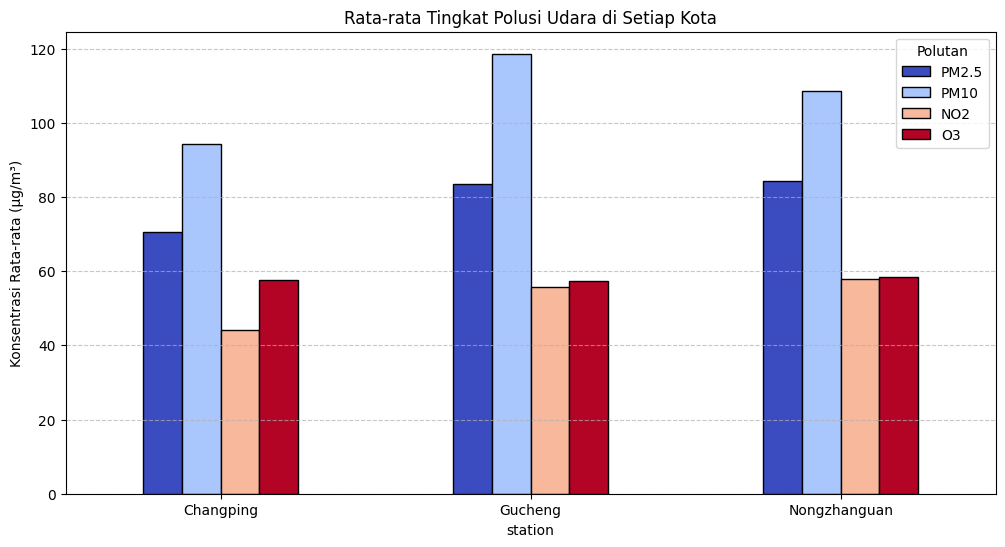

                  PM2.5        PM10        NO2         O3
station                                                  
Changping     70.545694   94.281790  44.026443  57.734328
Gucheng       83.412651  118.646161  55.759226  57.430945
Nongzhanguan  84.375713  108.690044  57.957107  58.339367


In [55]:
#Visualisasi rata-rata tingkat polusi udara di setiap kota
plt.figure(figsize=(12, 6))
pollution_avg.plot(kind="bar", figsize=(12, 6), colormap="coolwarm", edgecolor="black")
plt.title("Rata-rata Tingkat Polusi Udara di Setiap Kota")
plt.ylabel("Konsentrasi Rata-rata (µg/m³)")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="Polutan")
plt.show()

print(pollution_avg)

**Insight:**
- PM2.5: Kota dengan tingkat polusi udara tertinggi adalah Nongzhanguan dengan konsentrasi rata-rata 84.37, diikuti oleh Gucheng (83.41) dengan selisih tipis, serta Changping (70.54).
- PM10: Polusi udara tertinggi terjadi di Gucheng (118.64), diikuti oleh Nongzhanguan (108.69) dan Changping (94.28).
- NO2: Kota dengan tingkat polusi udara tertinggi adalah Nongzhanguan (57.95), diikuti oleh Gucheng (55.75) dan Changping (44.02).
- O3: Konsentrasi rata-rata tertinggi terdapat di Nongzhanguan (58.33), disusul oleh Changping (57.73) dan Gucheng (57.43).








## Analisis Lanjutan - Klasifikasi Kualitas Udara Kota Berdasarkan PM2.5 dengan Pendekatan Clustering (Manual Grouping)

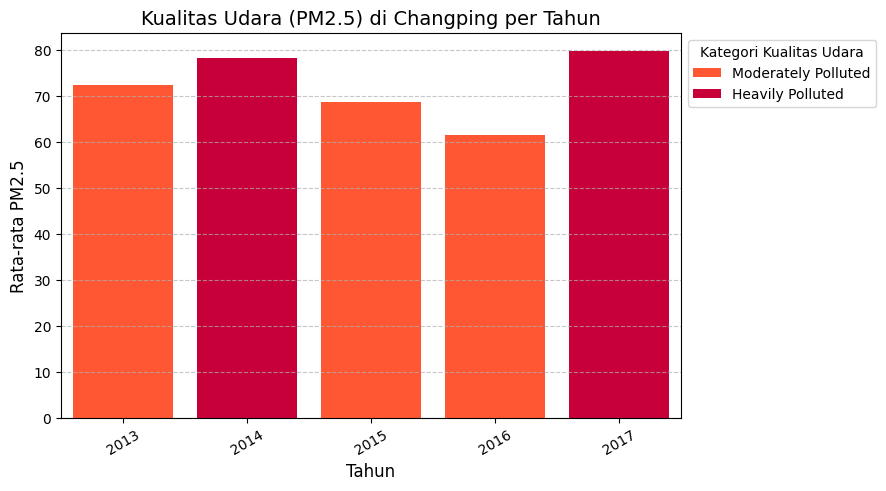

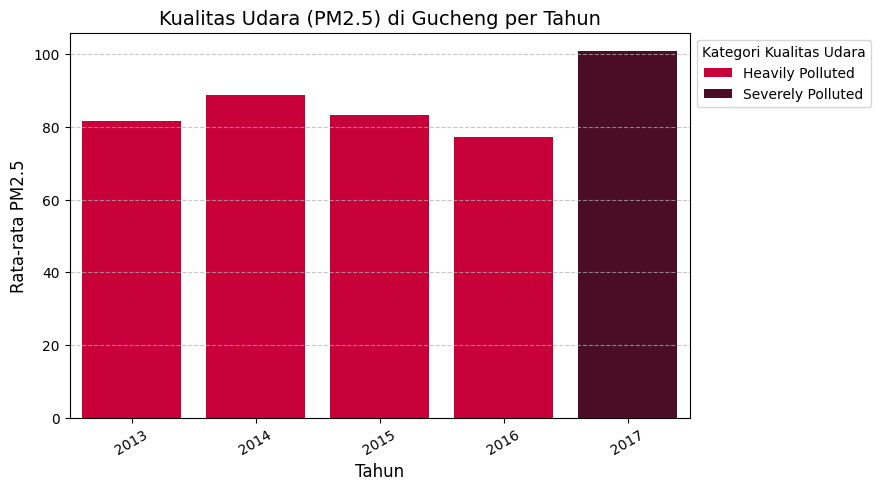

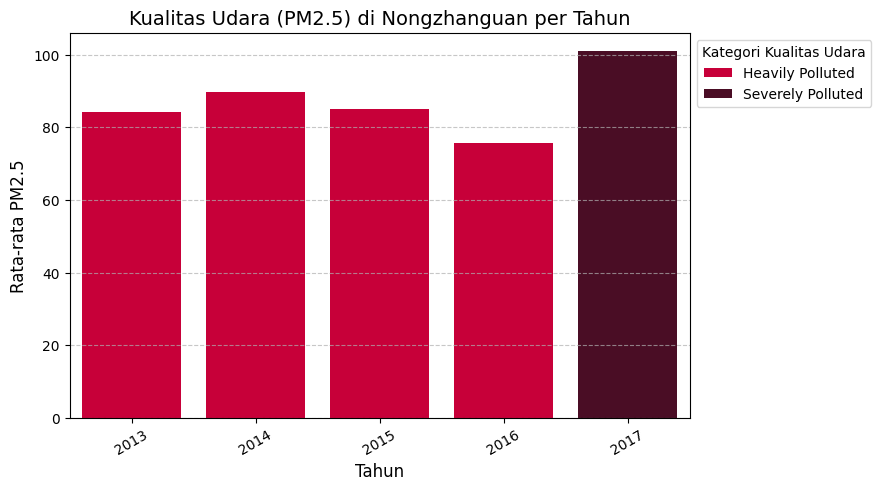

In [56]:
#Palet warna untuk kategori kualitas udara
custom_palette = {
    "Excellent": "#2E91E5",  #Biru muda
    "Good": "#57C4AD",       #Hijau kebiruan
    "Lightly Polluted": "#FFC300",  #Kuning
    "Moderately Polluted": "#FF5733",  #Oranye
    "Heavily Polluted": "#C70039",  #Merah
    "Severely Polluted": "#4A0D25"   #Merah Gelap
}

#Mengkategorikan kualitas udara berdasarkan PM2.5
def categorize_air_quality(pm25):
    if pm25 <= 15:
        return "Excellent"
    elif pm25 <= 35:
        return "Good"
    elif pm25 <= 55:
        return "Lightly Polluted"
    elif pm25 <= 75:
        return "Moderately Polluted"
    elif pm25 <= 100:
        return "Heavily Polluted"
    else:
        return "Severely Polluted"

air_quality_avg = air_quality_df.groupby(["year", "station"])["PM2.5"].mean().reset_index()
air_quality_avg["Air_Quality_Category"] = air_quality_avg["PM2.5"].apply(categorize_air_quality)

for station in air_quality_avg["station"].unique():
    city_data = air_quality_avg[air_quality_avg["station"] == station]

    plt.figure(figsize=(8, 5))
    sns.barplot(
        x="year",
        y="PM2.5",
        hue="Air_Quality_Category",
        data=city_data,
        palette=custom_palette,
        dodge=False,
        saturation=1
    )

    plt.title(f"Kualitas Udara (PM2.5) di {station} per Tahun", fontsize=14)
    plt.xlabel("Tahun", fontsize=12)
    plt.ylabel("Rata-rata PM2.5", fontsize=12)
    plt.xticks(rotation=30)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.legend(title="Kategori Kualitas Udara", bbox_to_anchor=(1,1))

    plt.show()

In [57]:
print(air_quality_avg)

    year       station       PM2.5 Air_Quality_Category
0   2013     Changping   72.524782  Moderately Polluted
1   2013       Gucheng   81.593410     Heavily Polluted
2   2013  Nongzhanguan   84.212963     Heavily Polluted
3   2014     Changping   78.339075     Heavily Polluted
4   2014       Gucheng   88.652432     Heavily Polluted
5   2014  Nongzhanguan   89.628048     Heavily Polluted
6   2015     Changping   68.720879  Moderately Polluted
7   2015       Gucheng   83.179212     Heavily Polluted
8   2015  Nongzhanguan   85.183139     Heavily Polluted
9   2016     Changping   61.452755  Moderately Polluted
10  2016       Gucheng   77.139686     Heavily Polluted
11  2016  Nongzhanguan   75.799863     Heavily Polluted
12  2017     Changping   79.764124     Heavily Polluted
13  2017       Gucheng  100.790254    Severely Polluted
14  2017  Nongzhanguan  100.930791    Severely Polluted


**Insight:**
- Pada kota Changping, tahun 2013, 2015, dan 2016 berada dalam kategori Moderately Polluted, yang berarti udara cukup tercemar tetapi tidak terlalu berbahaya. Akan tetapi, pada tahun 2014 dan 2017 masuk kategori Heavily Polluted yang menandakan adanya peningkatan polusi pada tahun-tahun tersebut.

- Pada kota Gucheng, tahun 2013 hingga 2016 berada dalam kategori Heavily Polluted, yang berarti kualitas udara di kota ini relatif buruk selama empat tahun berturut-turut. Hingga pada tahun 2017 mengalami peningkatan polusi drastis (Severely Polluted) yang menunjukkan ada faktor yang menyebabkan lonjakan polusi.

- Pada kota Nongzhanguan, tahun 2013 hingga 2016 berada dalam kategori Heavily Polluted, yang berarti polusi udara di kota ini konsisten berada di tingkat yang tinggi. Kemudian pada tahun 2017 meningkat ke kategori Severely Polluted yang mana tren ini menunjukkan bahwa kualitas udara semakin memburuk.


## Conclusion

- Secara keseluruhan, polusi udara di tiga kota mengalami pola yang tidak stabil, dengan beberapa tahun mengalami perbaikan, namun diikuti oleh lonjakan signifikan, terutama pada 2017. Hal ini mengindikasikan bahwa faktor-faktor eksternal seperti perubahan cuaca, kebijakan lingkungan, atau peningkatan aktivitas industri dapat mempengaruhi kualitas udara secara dinamis.

- Suhu cenderung menurunkan NO2, PM2.5, dan PM10, tetapi meningkatkan O3 karena efek dispersi udara dan pembentukan ozon. Kelembaban membantu mengurangi polutan partikulat namun berkontribusi pada peningkatan O3. Sementara itu, hujan hanya memiliki efek kecil dalam membersihkan udara dari polutan, terutama NO2.

- PM2.5: Kota dengan tingkat polusi udara tertinggi adalah Nongzhanguan dengan konsentrasi rata-rata 84.37, diikuti oleh Gucheng (83.41) dengan selisih tipis, serta Changping (70.54).
PM10: Polusi udara tertinggi terjadi di Gucheng (118.64), diikuti oleh Nongzhanguan (108.69) dan Changping (94.28).
NO2: Kota dengan tingkat polusi udara tertinggi adalah Nongzhanguan (57.95), diikuti oleh Gucheng (55.75) dan Changping (44.02).
O3: Konsentrasi rata-rata tertinggi terdapat di Nongzhanguan (58.33), disusul oleh Changping (57.73) dan Gucheng (57.43).

- Tren kualitas udara di tiga kota menunjukkan peningkatan polusi, terutama pada 2017. Changping mengalami fluktuasi dari Moderately Polluted ke Heavily Polluted, sementara Gucheng dan Nongzhanguan konsisten Heavily Polluted sebelum memburuk menjadi Severely Polluted pada 2017. Lonjakan ini menandakan perlunya langkah pengendalian polusi yang lebih efektif.